In [ ]:
import re
import pandas as pd

In [ ]:
f= open('WhatsApp Chat with Lab Div B Batch 1 Unofficial.txt','r',encoding='utf-8')

In [ ]:
data = f.read()

In [ ]:
print(type(data))

<class 'str'>


In [ ]:
pattern  = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-332419532.py:1: SyntaxWarning: invalid escape sequence '\d'
  pattern  = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'


In [ ]:
messages = re.split(pattern,data)[1:]
len(messages)

290

In [ ]:
dates = re.findall(pattern,data)
len(dates)

290

In [ ]:
df = pd.DataFrame({'user_message':messages,'message_date':dates})
#convert message data type
df['message_date'] = pd.to_datetime(df['message_date'],format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date':'date'},inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. O...,2024-08-05 14:24:00
1,"Kunal_Jadhav <हविकेपी> created group ""DBMS Lab...",2024-07-10 10:37:00
2,~ Pratik Pujari added you\n,2024-08-05 14:24:00
3,~ Aditya Chavan added ~ Prasad Gharote\n,2024-08-05 15:03:00
4,+91 81087 35755: <Media omitted>\n,2024-08-05 15:02:00


In [ ]:
df.shape

(290, 2)

In [ ]:
#Seperate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'],inplace=True)
df.head()


<>:5: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipython-input-80735890.py:5: SyntaxWarning: invalid escape sequence '\w'
  entry = re.split('([\w\W]+?):\s',message)


,date,user,message
0,2024-08-05 14:24:00,group_notification,Messages and calls are end-to-end encrypted. O...
1,2024-07-10 10:37:00,group_notification,"Kunal_Jadhav <हविकेपी> created group ""DBMS Lab..."
2,2024-08-05 14:24:00,group_notification,~ Pratik Pujari added you\n
3,2024-08-05 15:03:00,group_notification,~ Aditya Chavan added ~ Prasad Gharote\n
4,2024-08-05 15:02:00,+91 81087 35755,<Media omitted>\n


In [ ]:
df['year'] = df['date'].dt.year

In [ ]:
df['month'] = df['date'].dt.month_name()

In [ ]:
df['day'] = df['date'].dt.day

In [ ]:
df['hour'] = df['date'].dt.hour

In [ ]:
df['minute'] = df['date'].dt.minute

In [ ]:
words=[]
for message in df['message']:
    words.extend(message.split())

In [ ]:
len(words)

1313

In [ ]:
!pip install urlextract


In [ ]:
from urlextract import URLExtract
extractor = URLExtract()

In [ ]:
links=[]
for message in df['message']:
  links.extend(extractor.find_urls(message))

In [ ]:
len(links)

9

In [ ]:
x=df['user'].value_counts().head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
name=x.index
count=x.values

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2361 (\N{DEVANAGARI LETTER HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2357 (\N{DEVANAGARI LETTER VA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2367 (\N{DEVANAGARI VOWEL SIGN I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 2325 (\N{DEVANAGARI LETTER KA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/

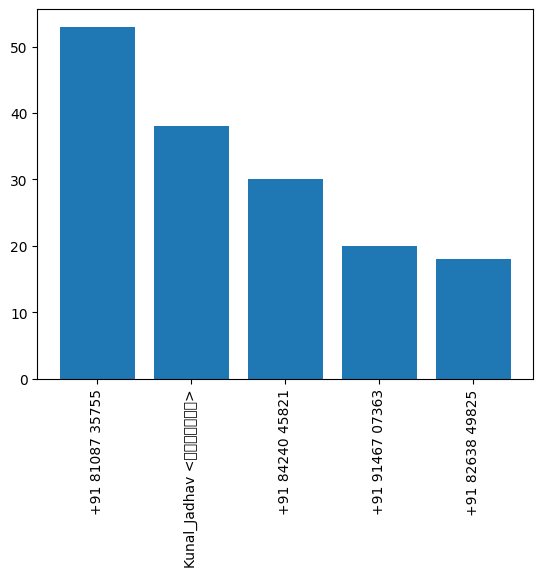

In [ ]:
plt.bar(name,count)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
round(df['user'].value_counts().head()/df.shape[0]*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,percent,count
0,+91 81087 35755,18.28
1,Kunal_Jadhav <हविकेपी>,13.10
2,+91 84240 45821,10.34
3,+91 91467 07363,6.90
4,+91 82638 49825,6.21


In [ ]:
temp = df[df['user'] != 'group_notification']
temp=temp[temp['message'] != '<Media omitted>\n']

In [ ]:
f= open('stop_hinglish.txt','r')
stop_words = f.read()

In [ ]:
words=[]
for message in temp['message']:
  for word in message.lower().split():
    if word not in stop_words:
      words.append(word)

In [ ]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,message,12
1,deleted,11
2,team,7
3,lab,5
4,aahe,5
5,mg,5
6,bolle,5
7,business,5
8,link,5
9,mam,4


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 10.4 MB/s eta 0:00:00


In [ ]:
import emoji

emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.EMOJI_DATA])


In [ ]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,5
1,🙏,2
2,🌏,1
3,🤫,1
4,😭,1
5,🤣,1
6,💀,1
7,🔥,1
8,🏻,1
9,🏼,1


In [ ]:
df['month_num'] = df['date'].dt.month

In [ ]:
timeline=df.groupby(['year','month_num','month']).count()['message'].reset_index()

In [ ]:
time=[]
for i in range(timeline.shape[0]):
  time.append(timeline['month'][i] + "-" + str(timeline['year'][i]))

In [ ]:
timeline['time']=time

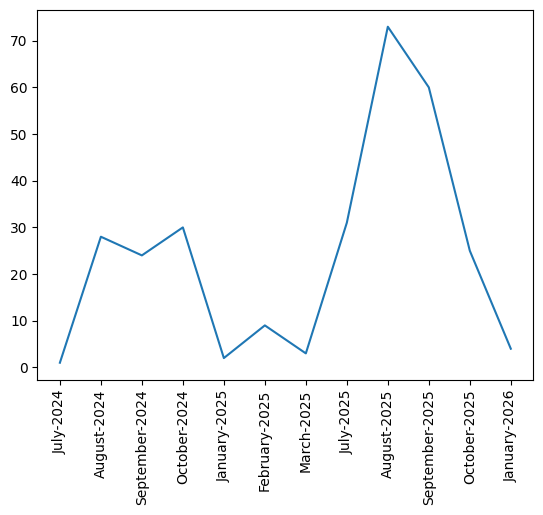

In [ ]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['only_date']=df['date'].dt.date

In [ ]:
daily_timeline=df.groupby(['only_date']).count()['message'].reset_index()

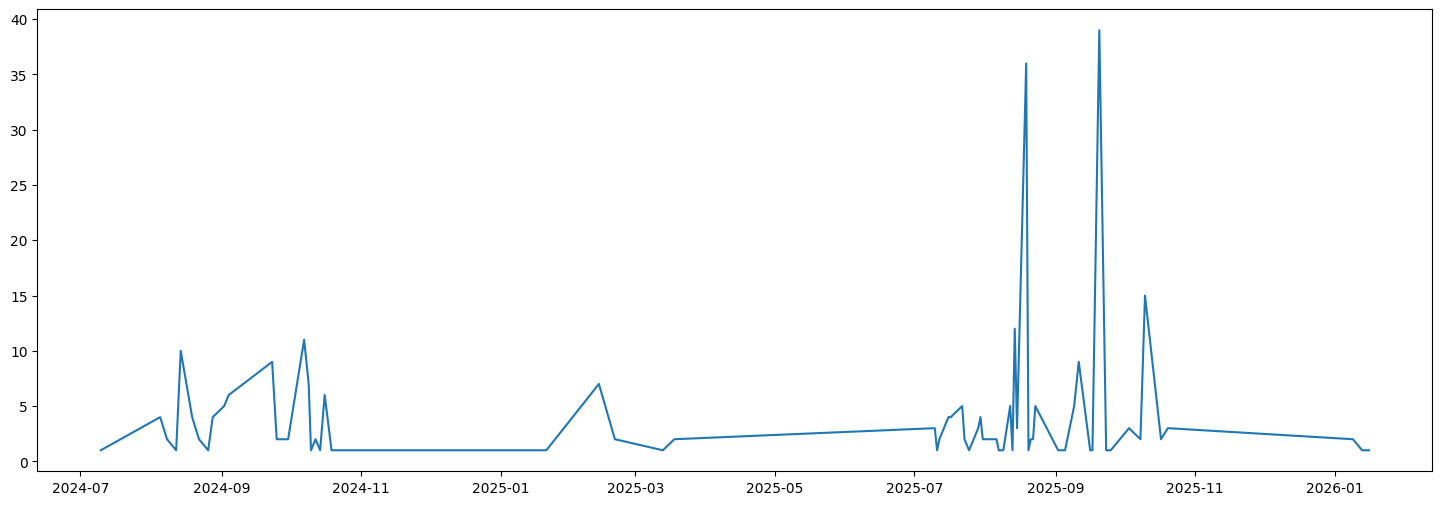

In [ ]:
plt.figure(figsize=(18,6))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])
plt.show()

In [ ]:
df['day_name']=df['date'].dt.day_name()

In [ ]:
df['day_name'].value_counts()

,count
day_name,
Tuesday,63
Wednesday,53
Saturday,51
Thursday,51
Monday,41
Friday,31


In [ ]:
df['month'].value_counts()

,count
month,
August,101
September,84
October,55
July,32
February,9
January,6
March,3


In [ ]:
period=[]
for hour in df[['day_name','hour']]['hour']:
  if hour==23:
    period.append(str(hour) + "-" + str('00'))
  elif hour==0:
    period.append(str('00') + "-" + str(hour+1))
  else:
    period.append(str(hour) + "-" + str(hour+1))

In [ ]:
df['period']=period

In [ ]:
df.sample(5)

,date,user,message,year,month,day,hour,minute,month_num,only_date,day_name,period
255,2025-09-20 16:35:00,+91 81087 35755,<Media omitted>\n,2025,September,20,16,35,9,2025-09-20,Saturday,16-17
275,2025-10-10 09:21:00,+91 90045 56846,Which presentation?\n,2025,October,10,9,21,10,2025-10-10,Friday,9-10
45,2024-09-23 19:14:00,Kunal_Jadhav <हविकेपी>,This message was deleted\n,2024,September,23,19,14,9,2024-09-23,Monday,19-20
259,2025-09-23 13:55:00,+91 84240 45821,<Media omitted>\n,2025,September,23,13,55,9,2025-09-23,Tuesday,13-14
75,2024-10-16 14:12:00,Kunal_Jadhav <हविकेपी>,.\n,2024,October,16,14,12,10,2024-10-16,Wednesday,14-15


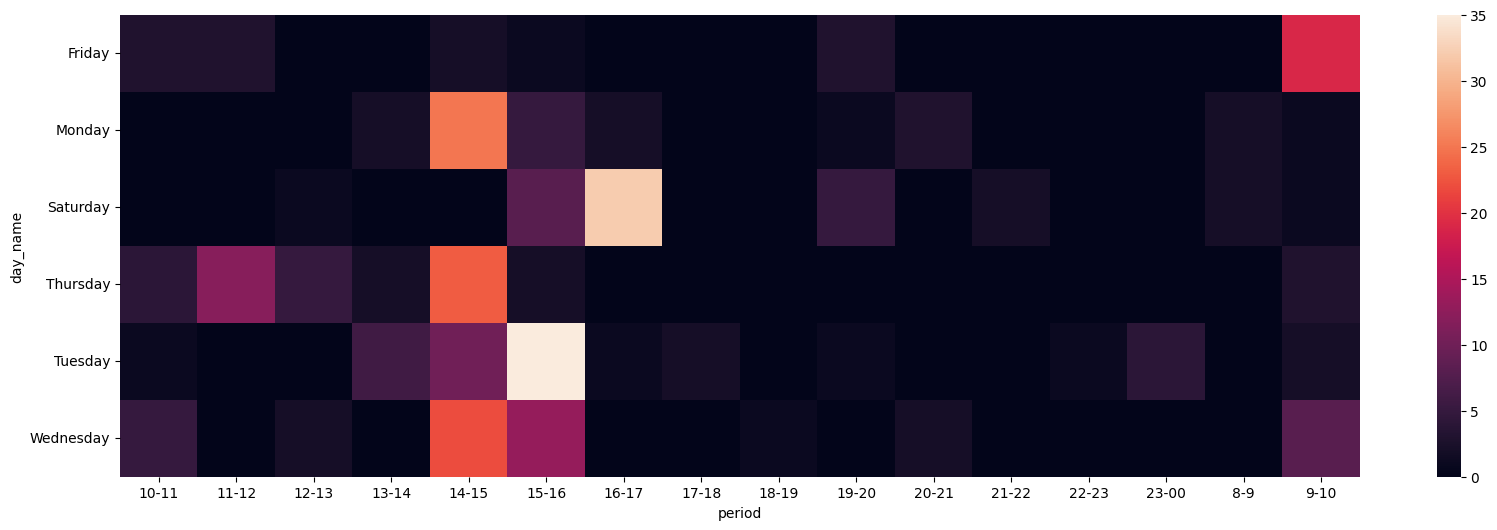

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table(index='day_name',columns='period',values='message',aggfunc='count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()